# 일정시간 (ex. 앞 0.5초 ref 뒤 0.5 after 이런식으로 데이터 표시하기.)

In [175]:
import pandas as pd
from datetime import datetime

data = pd.read_excel('./clean_dataset/session_2_clean.xlsx') # stimulus 시점 표시된 clean data 가져오기.
data

,Unnamed: 0,TimeStamp,Delta_AF8,Theta_AF8,Alpha_AF8,Beta_AF8,Gamma_AF8,stimulus
0,0,2022-07-17 22:14:17.780,0.041920,-0.090238,0.209607,0.834797,0.460706,0
1,2,2022-07-17 22:14:17.781,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
2,3,2022-07-17 22:14:17.784,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
3,4,2022-07-17 22:14:17.785,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
4,5,2022-07-17 22:14:17.785,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
...,...,...,...,...,...,...,...,...
66955,66990,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0
66956,66991,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0
66957,66992,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0
66958,66993,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0


In [176]:
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,TimeStamp,Delta_AF8,Theta_AF8,Alpha_AF8,Beta_AF8,Gamma_AF8,stimulus
0,2022-07-17 22:14:17.780,0.041920,-0.090238,0.209607,0.834797,0.460706,0
1,2022-07-17 22:14:17.781,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
2,2022-07-17 22:14:17.784,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
3,2022-07-17 22:14:17.785,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
4,2022-07-17 22:14:17.785,-0.015349,-0.087206,0.206153,0.842231,0.453874,0


In [177]:
# 자극 시점 index 저장 (맨앞, 맨뒤 인덱스 포함)
point = []
point.append(0)
for i in range(len(data)) :
    if data['stimulus'][i] == 1:
        point.append(i)
point.append(len(data))
point

[0,
 7752,
 10572,
 13380,
 16212,
 19020,
 29520,
 32340,
 35149,
 37968,
 40776,
 51276,
 54084,
 56916,
 59724,
 62544,
 66960]

In [178]:
# 시간 간격 정해서 체크해주는거
data['temp'] = 0
start_idx = 0
end_idx = 0
# time_s = datetime.timedelta(days=14)
time_s = datetime.strptime('0:00:02.100000', "%H:%M:%S.%f")  - datetime.strptime('0:00:00.100000', "%H:%M:%S.%f") 
time_e = datetime.strptime('0:00:01.500000', "%H:%M:%S.%f")  - datetime.strptime('0:00:00.500000', "%H:%M:%S.%f") 
# time_delta로 맞춰줘야해서 
print(time_s, time_e)

# time_s = datetime.strptime('0:00:01.000000', "%H:%M:%S.%f") # 200ms 만들기
# time_e = datetime.strptime('0:00:00.500000', "%H:%M:%S.%f") # 200ms 만들기


for j in range(0, len(point)-1) :
    globals()['temp_idx_ref{}'.format(j)] = []
    globals()['temp_idx_after{}'.format(j)] = []
    for i in range(point[j-1], point[j]) : # stimulus time부터 앞으로 1.0~0.5s에 1 표시한거 즉, 자극 이전 레퍼런스 eeg
        time_stimulus = datetime.strptime(data['TimeStamp'][point[j]], "%Y-%m-%d %H:%M:%S.%f") # stimulus 가 1인 시간.
        time_data = datetime.strptime(data['TimeStamp'][i], "%Y-%m-%d %H:%M:%S.%f")
        time_interval = time_stimulus - time_data
        if time_interval > time_e and time_interval < time_s :
            data['temp'][i] = str(j) + 'ref'
            globals()['temp_idx_ref{}'.format(j)].append(i) # 각 인덱스 저장해주는 코드
        
    for i in range(point[j], point[j+1]) : # stimulus time부터 뒤로 0.5~1.0s에 2 표시한거 즉, 자극 이후 변화한 eeg
        time_stimulus = datetime.strptime(data['TimeStamp'][point[j]], "%Y-%m-%d %H:%M:%S.%f") # stimulus 가 1인 시간.
        time_data = datetime.strptime(data['TimeStamp'][i], "%Y-%m-%d %H:%M:%S.%f")
        time_interval = -(time_stimulus - time_data)
        if time_interval > time_e and time_interval < time_s :
            data['temp'][i] = str(j) + 'after'
            globals()['temp_idx_after{}'.format(j)].append(i)
        
## 여기까지하면 1Sec after 마다 시작점, 끝나는 점 기록한 temp_idx_ref1~15,  temp_idx_after1~15가 생김.

0:00:02 0:00:01


<ipython-input-178-63b8b0809e8d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['temp'][i] = str(j) + 'after'
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-178-63b8b0809e8d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['temp'][i] = str(j) + 'ref'


In [179]:
data

,TimeStamp,Delta_AF8,Theta_AF8,Alpha_AF8,Beta_AF8,Gamma_AF8,stimulus,temp
0,2022-07-17 22:14:17.780,0.041920,-0.090238,0.209607,0.834797,0.460706,0,0
1,2022-07-17 22:14:17.781,-0.015349,-0.087206,0.206153,0.842231,0.453874,0,0
2,2022-07-17 22:14:17.784,-0.015349,-0.087206,0.206153,0.842231,0.453874,0,0
3,2022-07-17 22:14:17.785,-0.015349,-0.087206,0.206153,0.842231,0.453874,0,0
4,2022-07-17 22:14:17.785,-0.015349,-0.087206,0.206153,0.842231,0.453874,0,0
...,...,...,...,...,...,...,...,...
66955,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0,0
66956,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0,0
66957,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0,0
66958,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0,0


In [180]:
# 일정 시간 잘라서 ref와 after 표시한거 파일로 저장
data.to_excel("./clean_dataset/clean_stimulus/session_2_clean_stimulus_1sec.xlsx")

# 여기서부터 히트맵 

In [241]:
# bins는 각 trial 마다의 temp_idx_after1 이거 가져와서 10개씩 자른 index 저장한거.
bins = list(range(temp_idx_after15[0],temp_idx_after15[-1], 10))# 수정 2
bins

[62808,
 62818,
 62828,
 62838,
 62848,
 62858,
 62868,
 62878,
 62888,
 62898,
 62908,
 62918,
 62928,
 62938,
 62948,
 62958,
 62968,
 62978,
 62988,
 62998,
 63008,
 63018,
 63028,
 63038,
 63048,
 63058,
 63068]

In [242]:
after15_mean_10_sec = pd.DataFrame(columns=['delta','theta','alpha','beta','gamma'])# 수정
for i in range(0,len(bins)-1):
    delta = data['Delta_AF8'][bins[i]:bins[i+1]].mean()
    theta = data['Theta_AF8'][bins[i]:bins[i+1]].mean()
    alpha = data['Alpha_AF8'][bins[i]:bins[i+1]].mean()
    beta = data['Beta_AF8'][bins[i]:bins[i+1]].mean()
    gamma = data['Gamma_AF8'][bins[i]:bins[i+1]].mean()
    
    after15_mean_10_sec.loc[i]=[delta,theta,alpha,beta,gamma]# 수정

Text(0.5, 30.5, 'Time(sec)')

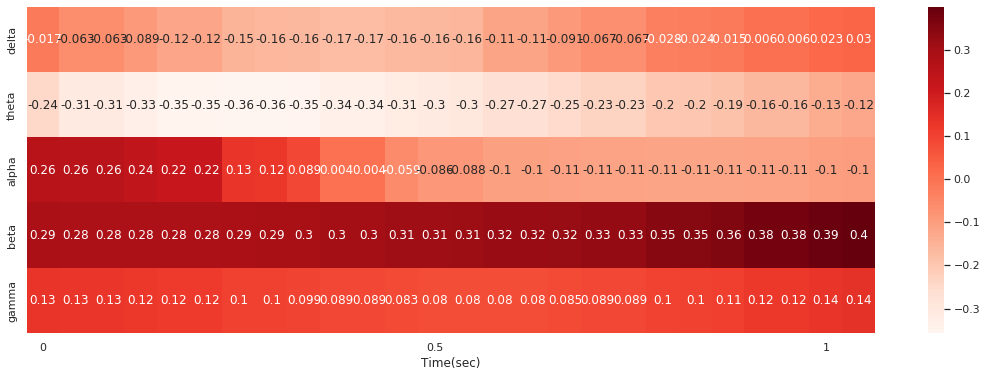

In [243]:
after15_mean_10_sec_T = after15_mean_10_sec.transpose()# 수정 2

from pandas import Series, DataFrame


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
xtime = [0,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ', ' ',0.5,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',1]

sns.set(rc = {'figure.figsize':(19,6)})
ax=sns.heatmap(after15_mean_10_sec_T, cmap='Reds', annot=True,xticklabels=xtime)# 수정
plt.xlabel("Time(sec)")


In [244]:
sfig = ax.get_figure()
sfig.savefig('./분석 시각화/session2/after15_mean_10_sec.png',  orientation="landscape") # 수정